# Evalution_04

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# load the dataset
df = pd.read_csv('../bank-full.csv', sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
df_selected_feature = df.drop(['default', 'loan'], axis=1)
df_selected_feature.head(2)

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,2143,yes,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,-1,0,unknown,no


In [7]:
df_selected_feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   balance    45211 non-null  int64 
 5   housing    45211 non-null  object
 6   contact    45211 non-null  object
 7   day        45211 non-null  int64 
 8   month      45211 non-null  object
 9   duration   45211 non-null  int64 
 10  campaign   45211 non-null  int64 
 11  pdays      45211 non-null  int64 
 12  previous   45211 non-null  int64 
 13  poutcome   45211 non-null  object
 14  y          45211 non-null  object
dtypes: int64(7), object(8)
memory usage: 5.2+ MB


In [5]:
# split the data into 3 part
from sklearn.model_selection import train_test_split
df_full_train, df_test = train_test_split(df_selected_feature, test_size=0.20, random_state=1)
df_train, df_val = train_test_split(df_full_train,test_size=0.25, random_state=1)
len(df_train),len(df_test),len(df_val), len(df_train)+len(df_test)+len(df_val)

(27126, 9043, 9042, 45211)

In [6]:
y_train = df_train['y']
y_val = df_val['y']
y_test = df_test['y']
len(y_train), len(y_val), len(y_test)

(27126, 9042, 9043)

In [7]:
#  del the y column
del df_train["y"]
del df_val["y"]
del df_test["y"]

In [8]:
# encode the features for training
from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer(sparse=False)
# convert to dataframe to dic for encoding
train_dic = df_train.to_dict(orient='records')
val_dic = df_val.to_dict(orient='records')

# fit and transform train split 
X_train = dv.fit_transform(train_dic)
X_val = dv.transform(val_dic)

len(X_train), len(X_val)


(27126, 9042)

In [15]:
dv.get_feature_names_out()

array(['age', 'balance', 'campaign', 'contact=cellular',
       'contact=telephone', 'contact=unknown', 'day', 'duration',
       'education=primary', 'education=secondary', 'education=tertiary',
       'education=unknown', 'housing=no', 'housing=yes', 'job=admin.',
       'job=blue-collar', 'job=entrepreneur', 'job=housemaid',
       'job=management', 'job=retired', 'job=self-employed',
       'job=services', 'job=student', 'job=technician', 'job=unemployed',
       'job=unknown', 'marital=divorced', 'marital=married',
       'marital=single', 'month=apr', 'month=aug', 'month=dec',
       'month=feb', 'month=jan', 'month=jul', 'month=jun', 'month=mar',
       'month=may', 'month=nov', 'month=oct', 'month=sep', 'pdays',
       'poutcome=failure', 'poutcome=other', 'poutcome=success',
       'poutcome=unknown', 'previous'], dtype=object)

In [9]:
# train the model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [10]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_val)
accuracy_score(y_pred, y_val)


0.8974784339747843

In [11]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_val)
accuracy_score(y_val, y_pred)


0.8974784339747843

In [24]:
len(y_val)/len(X_val)

1.0

In [37]:
y_pred = model.predict_proba(X_val)[:, 1]
churn_decision = (y_pred >=0.5)

In [38]:
(y_val == churn_decision).sum()

np.int64(0)

In [39]:
y_val.shape, y_pred.shape, X_val.shape

((9042,), (9042,), (9042, 47))

In [80]:
y_val = y_val.map({'yes':1, 'no':0})
y_train = y_train.map({'yes':1, 'no':0})

In [84]:
y_val.value_counts()

y
0    7944
1    1098
Name: count, dtype: int64

In [85]:
actual_positive = (y_val == 1)
actual_negative = (y_val == 0)


In [86]:
actual_positive.value_counts()

y
False    7944
True     1098
Name: count, dtype: int64

In [83]:
actual_negative.value_counts()

y
True     7944
False    1098
Name: count, dtype: int64

In [88]:
t = 0.5
predict_positive = (y_pred >= t)
predict_negative = (y_pred < t)

In [92]:
tp = (predict_positive & actual_positive).sum()
tn = (predict_negative & actual_negative).sum()

In [91]:
fp = (predict_positive & actual_negative).sum()
fn = (predict_negative & actual_positive).sum()

In [93]:
fp, fn

(np.int64(191), np.int64(736))

In [94]:
confusion_maxtrix = np.array(
    [
        [tn, fp],
        [fn, tp]
    ]
)

confusion_maxtrix

array([[7753,  191],
       [ 736,  362]])

### Confusion table

-  Precision : fraction of positive predictions that are correct

- Recall :

In [95]:
#  Precision
p = tp / (tp + fp)
p 

np.float64(0.6546112115732369)

In [96]:
# Recall
r = tp / (tp + fn)
r

np.float64(0.3296903460837887)

#### ROC Curves: Receiver operating characteristics



fpr = fp / (tn + fp)
tpr = tp / (fn + tp)

In [97]:
fpr = fp / (tn + fp)
tpr = tp / (fn + tp)

In [98]:
fpr, tpr

(np.float64(0.02404330312185297), np.float64(0.3296903460837887))

In [99]:
thresholds = np.linspace(0, 1, 101)
scores = []

for t in thresholds:
    actual_positive = (y_val==1)
    actual_negative = (y_val==0)
    
    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)
    
    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()
    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()
    scores.append((t, tp, fp, fn, tn))

In [102]:
df_score = pd.DataFrame(scores, columns=["threshold","tp", "fp", "fn", "tn"])

In [103]:
df_score.head()

,threshold,tp,fp,fn,tn
0,0.00,1098,7944,0,0
1,0.01,1094,7046,4,898
2,0.02,1093,5816,5,2128
3,0.03,1087,4796,11,3148
4,0.04,1073,3862,25,4082


In [104]:
df_score["fpr"] = df_score.tp / (df_score.tn + df_score.fp)
df_score['tpr']= df_score.tp / (df_score.fn + df_score.tp)

In [105]:
df_score.head()

,threshold,tp,fp,fn,tn,fpr,tpr
0,0.00,1098,7944,0,0,0.138218,1.000000
1,0.01,1094,7046,4,898,0.137714,0.996357
2,0.02,1093,5816,5,2128,0.137588,0.995446
3,0.03,1087,4796,11,3148,0.136833,0.989982
4,0.04,1073,3862,25,4082,0.135070,0.977231


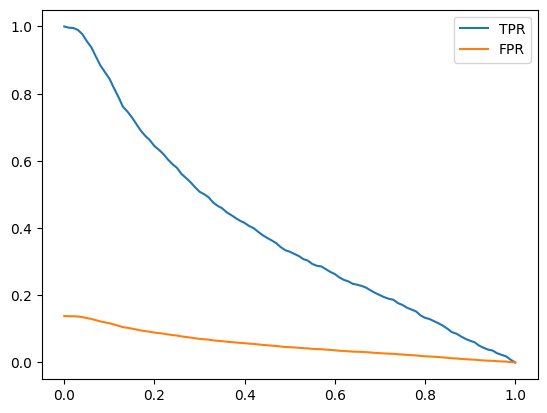

In [106]:
plt.plot(df_score['threshold'], df_score['tpr'], label = "TPR")
plt.plot(df_score['threshold'], df_score['fpr'], label = "FPR")
plt.legend()

In [107]:
from sklearn.metrics import roc_curve

fpr_roc,tpr_roc, thresholds_roc = roc_curve(y_val, y_pred)


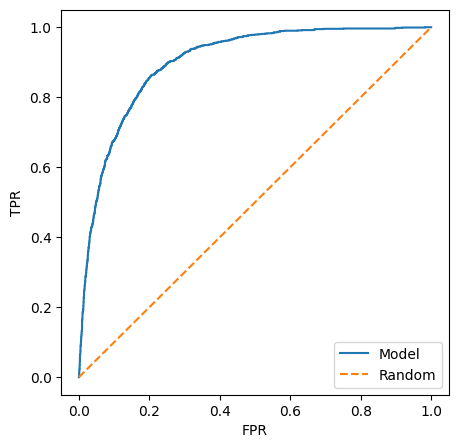

In [108]:
plt.figure(figsize=(5,5))

plt.plot(fpr_roc, tpr_roc, label = "Model")
plt.plot([0, 1], [0, 1], label = "Random", linestyle = "--")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()

##### ROC AUC

In [111]:
from sklearn.metrics import auc
auc(fpr_roc, tpr_roc)

np.float64(0.9006884713944792)

In [ ]:
auc(df_score.fpr, df_score.tpr)